In [1]:
#playground.tensorflow.org

# Introduction to neural network classification with Tensorflow
**Classification:** Is where  you try to classify something as one thing or another.
1. Binary Classification
2. Multiple Classification
3. Multilabel Classification



# Creating data to view and fit


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalCrossentropy,BinaryCrossentropy

2023-10-07 14:48:25.874309: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-07 14:48:25.874356: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-07 14:48:27.905951: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-10-07 14:48:27.906169: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-10-07 14:48:27.906182: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [3]:
from sklearn.datasets import make_circles

#make 100 examples
n_samples = 1000

#create circles
X,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [4]:
#check our features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
#check labels
y[:10]


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

# Our data is a littel hard to understand now.Lets Visualize it !


In [6]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


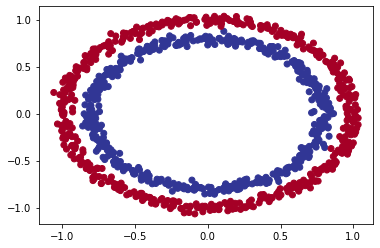

In [7]:
#visualise with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

## Input & Output  shapes


In [8]:
#check the shapes of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
#how many samples we're working  with
len(X),len(y)

(1000, 1000)

In [10]:
#view the first examples of features and labels
X[8],y[8]

(array([-0.16932234, -0.79345575]), 1)

# Steps in modelling


The steps in modelling with TensorFlow are :
1. Create or import a model
2. Compile the model
3. Fit the model 
4. Evaluate the model
5. Tweak
6. Evalute
.
.
.

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Activation,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalCrossentropy,BinaryCrossentropy

In [12]:
from tensorflow.keras.layers import Flatten 

In [13]:
x_df=tf.keras.utils.normalize(X,axis=1)  #normalized the data

In [14]:
#set random seed
tf.random.set_seed(42)

model=tf.keras.Sequential([
    Flatten(),
    Dense(units=50),
    Dense(units=20),
    Dense(units=1)
])

#compile it
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"]
             )


#fit model
model.fit(x_df,
          y,
          epochs=100
)

2023-10-07 14:48:32.929015: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-07 14:48:32.929544: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-07 14:48:32.929583: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mylar-pc): /proc/driver/nvidia/version does not exist


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.7428 - accuracy: 0.4940
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8278 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7174 - accuracy: 0.5010
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.4990
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5020
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4900
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4900
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4620
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.4670
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4950
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4650
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.4910
Epoch 87/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6969 - accuracy: 0.4810
Epoch 88/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6982 - accuracy: 0.4710
Epoch 89/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.4770
Epoch 90/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6981 - accuracy: 0.4920
Epoch 91/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.4840
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.4620
Epoch 93/100


In [15]:
#improving model by training for longer
model.fit(X,y,epochs=200,verbose=0)

In [16]:
model.evaluate(X,y)#not right to evelaute with trainning data but just for experimental sake


32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4610


[0.6937054395675659, 0.460999995470047]

since we're working on binary classification problem and our model is getting around ~50% accuracy .. it's performing as if it's guessing.


So let's step thing up a notch and add an extra layer


#model 1

In [17]:
#set random seed
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    
    Dense(units=10),
    Dense(units=2)
])

#compile it
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["accuracy"]
             )


#fit model
model_1.fit(X,
          y,
          epochs=100,
            verbose=0
)

The model seems to still be around a 50% accuracy so we still have to tweak
it 

# model 2

In [18]:
#seed
tf.random.set_seed(42)

#create model
model_2 = tf.keras.Sequential([
    Flatten(),
    Dense(units=100),
    Dense(units=10),
    Dense(units=1)
    
])


#compile it
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
            

)

# Fit MODEL
model_2.fit(X,
           y,
           epochs=10,
           verbose=0)

# Model 3

In [19]:
tf.random.set_seed(42)

#Create model
model_3=tf.keras.Sequential([
    
    Dense(units=100),
    Dense(units=50),
    Dense(units=20,),
    Dense(units=1,)
    
])

#compile model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                

)

#fit model
History = model_3.fit(X,
                     y,
                     epochs=100,
                     verbose=0)

In [20]:
import pandas as pd
import numpy as np

Text(0.5, 0, 'epochs')

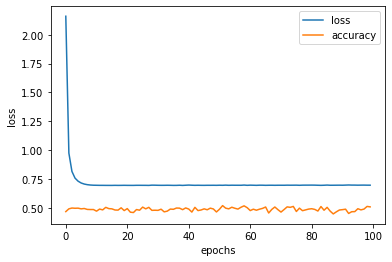

In [21]:
# PLOT HISTORY (also know as a loss curve or a training curve)
pd.DataFrame(History.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [22]:
X.shape,y.shape

((1000, 2), (1000,))

In [23]:
model_3.evaluate(X,y)#not right to evelaute with the same training data


32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4990


[0.6971588730812073, 0.49900001287460327]

# Model 4

In [24]:
tf.random.set_seed(42)

#Create model
model_4=tf.keras.Sequential([
    Dense(units=100 ),
    Dense(units=50),
    Dense(units=1)
    
])

#compile model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                

)

#fit model
history=model_4.fit(X,
            y,
            epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.6623 - accuracy: 0.5330
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.3857 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.4299 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6155 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 93/100


In [25]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Text(0.5, 0, 'epochs')

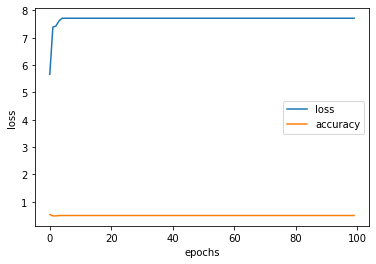

In [26]:
# PLOT HISTORY (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [27]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               300       
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,401
Trainable params: 5,401
Non-trainable params: 0
_________________________________________________________________


# Visualize some of its predictions


# Visualization

 ***To viusalise our models prediction lets create a function 'plot_descision_boundary()', this function will:***
1. Take in a trained model , features X and label y
2. create a meshgred of the difference X values
3. make predictions accross the meshgid
4. Plot the predictions as  wel as a line  between  zones(where each unique class falls)

# useful modules
* meshgrid
* np.linspace
* np.c_


In [28]:
model_4.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[ -7.939337 ],
       [ -9.307029 ],
       [ -9.165211 ],
       [ -4.570031 ],
       [-17.63488  ],
       [ -4.749392 ],
       [ -3.4574301],
       [ -8.6399355],
       [-17.046436 ],
       [ -1.6611695],
       [-15.1567745],
       [ -2.8344371],
       [ -3.2686057],
       [-12.728243 ],
       [-14.942737 ],
       [-16.624151 ],
       [-13.595761 ],
       [-16.914248 ],
       [-11.493821 ],
       [-16.860302 ],
       [ -6.148788 ],
       [ -3.2870228],
       [-18.694056 ],
       [ -7.5491986],
       [ -6.8053455],
       [ -9.000581 ],
       [ -1.824096 ],
       [-11.163192 ],
       [-16.658632 ],
       [-13.880427 ],
       [-18.05072  ],
       [ -1.9504278],
       [ -3.6142569],
       [ -9.675754 ],
       [-19.331095 ],
       [ -4.802265 ],
       [ -5.686303 ],
       [ -3.9994638],
       [-16.42925  ],
       [ -4.476051 ],
       [-17.081518 ],
       [ -2.1478713],
       [-16.334015 ],
       [-11.901814 ],
       [-15.563443 ],
       [-1

In [29]:
import numpy as np

In [30]:



def plot_decision_boundary(model,X,y):
    '''
    Plots the decision boundary created by a model prediction on X.
    '''
    #Define the axis boundaries of the  plot and create a meshgrid
    x_min,x_max= X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
    y_min,y_max= X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1
    
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
    
    
    #create X values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(),yy.ravel()]#stacks 2D arr together
    
    #make predictions
    y_pred= model.predict(x_in)
    
    
    #check for multi-class
    if len(y_pred[0])>1:
        print('doing multiclass classification')
        #we have to reshape our prediction to get them ready fro plotting
        y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    #Plot tthe decision boundry
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:,1], c=y , s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(), yy.max())
    
     

In [31]:
x_min,x_max= X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
y_min,y_max= X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1

x_min,x_max,y_min,y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [32]:
y_pred=model_3.predict(X)

32/32 [==============================] - 0s 2ms/step


In [33]:
y_pred.shape

(1000, 1)

## Decision Boundaries of Models

***Resources**


313/313 [==============================] - 0s 980us/step
doing binary classification


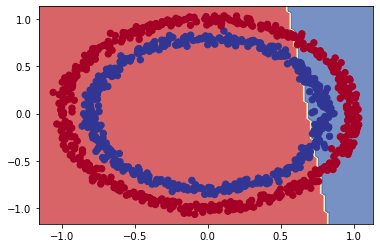

In [34]:
plot_decision_boundary(model=model,
                       X=X,
                       y=y)

313/313 [==============================] - 0s 1ms/step
doing multiclass classification


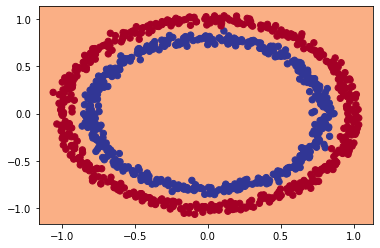

In [35]:
plot_decision_boundary(model=model_1,
                       X=X,
                       y=y)

313/313 [==============================] - 0s 1ms/step
doing binary classification


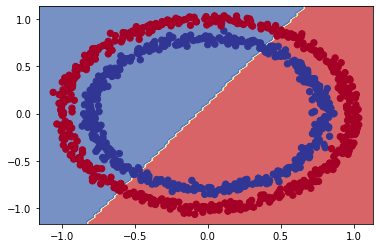

In [36]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

313/313 [==============================] - 0s 1ms/step
doing binary classification


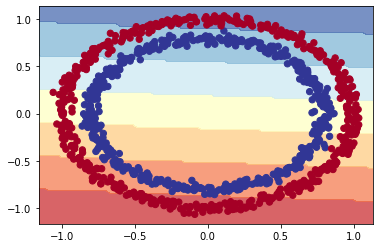

In [37]:
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

# Regression trial
***regression data***

In [38]:
#lets see if our model can be used for a regression problem


tf.random.set_seed(42)

#create Some reggression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100 ,1100, 5) # y = X + 100

#spliting our regression data into training and test
X_reg_train = X_regression[:150] #first 150
X_reg_test = X_regression[150:]#last 150
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]





In [39]:
X_regression,y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

# FITTING ERROR

#Fit  our model to the regression data
model_2.fit(X_reg_train,
           y_reg_train,  
            epochs=100)

In [40]:
X_reg_train.shape,y_reg_train.shape

(TensorShape([150]), TensorShape([150]))

****We compiled  our model for a binary classification problem***
***But ...we're now working on a regression prob, lets change  the model  to suit our data***

In [41]:
# Set sed
tf.random.set_seed(42)

#create model
reg_model_1 = tf.keras.Sequential([
    Dense(units=100,input_shape=(1,)),
    Dense(units=10),
    Dense(units=1)
])
#compile model,this time with a regression specific loss fucntion

reg_model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']
)

#fit model
reg_model_1.fit(X_reg_train,
            y_reg_train,
            epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 428.2961 - mae: 428.2961
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 304.8853 - mae: 304.8853
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 185.4610 - mae: 185.4610
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 65.7758 - mae: 65.7758
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 76.4010 - mae: 76.4010
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 92.5745 - mae: 92.5745
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 61.1977 - mae: 61.1977
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 46.7460 - mae: 46.7460
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 48.1172 - mae: 48.1172
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.9400 - mae: 42.9400
Epoch 11/100
5/5 [==============================] - 0

In [42]:
# Set sed
tf.random.set_seed(42)

#create model
reg_model_2 = tf.keras.Sequential([
    Dense(units=100,input_shape=(1,),activation='relu'),
    Dense(units=10,activation='relu'),
    Dense(units=1)
])
#compile model,this time with a regression specific loss fucntion

reg_model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']
)

#fit model
reg_model_2.fit(X_reg_train,
            y_reg_train,
            epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 478.2671 - mae: 478.2671
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 467.9120 - mae: 467.9120
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 457.9931 - mae: 457.9931
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 447.7397 - mae: 447.7397
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 437.0718 - mae: 437.0718
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 425.8236 - mae: 425.8236
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 414.9943 - mae: 414.9943
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 401.9971 - mae: 401.9971
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 378.4591 - mae: 378.4591
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 346.7231 - mae: 346.7231
Epoch 11/100
5/5 [=====================

5/5 [==============================] - 0s 3ms/step - loss: 40.1657 - mae: 40.1657
Epoch 88/100
5/5 [==============================] - 0s 3ms/step - loss: 40.1202 - mae: 40.1202
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 40.1217 - mae: 40.1217
Epoch 90/100
5/5 [==============================] - 0s 3ms/step - loss: 40.0829 - mae: 40.0829
Epoch 91/100
5/5 [==============================] - 0s 3ms/step - loss: 39.9742 - mae: 39.9742
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 39.9884 - mae: 39.9884
Epoch 93/100
5/5 [==============================] - 0s 3ms/step - loss: 40.2987 - mae: 40.2987
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 39.8263 - mae: 39.8263
Epoch 95/100
5/5 [==============================] - 0s 3ms/step - loss: 40.1528 - mae: 40.1528
Epoch 96/100
5/5 [==============================] - 0s 3ms/step - loss: 40.0576 - mae: 40.0576
Epoch 97/100
5/5 [==============================] - 0s 3ms/step

2/2 [==============================] - 0s 3ms/step


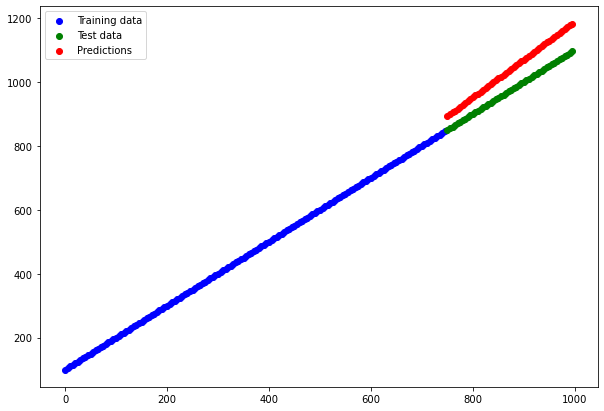

In [43]:
#Make predictions with trained  model

y_reg_pred = reg_model_2.predict(X_reg_test)

#plot the model's  predictions against our regression data

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c='b' , label="Training data")
plt.scatter(X_reg_test,y_reg_test, c='g' , label="Test data")
plt.scatter(X_reg_test,y_reg_pred, c='r' , label="Predictions")
plt.legend()

# Non-linearity

In [44]:
#set random seed
tf.random.set_seed(42)

#create the model
model_6=tf.keras.Sequential([
    Dense(units=1,activation="linear") 
])


#compile model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy']
)


In [45]:
#fit model
history=model_6.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.4132 - accuracy: 0.4910
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4112 - accuracy: 0.4910
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4001 - accuracy: 0.4910
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3902 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3797 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3655 - accuracy: 0.4900
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3637 - accuracy: 0.4910
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3621 - accuracy: 0.4910
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3596 - accuracy: 0.4910
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3589 - accuracy: 0.4910
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 6.1907 - accuracy: 0.4880
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1904 - accuracy: 0.4880
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1902 - accuracy: 0.4880
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1899 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1896 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1816 - accuracy: 0.4890
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1662 - accuracy: 0.4900
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1662 - accuracy: 0.4900
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1659 - accuracy: 0.4900
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1656 - accuracy: 0.4900
Epoch 93/100


## Visualizing our data

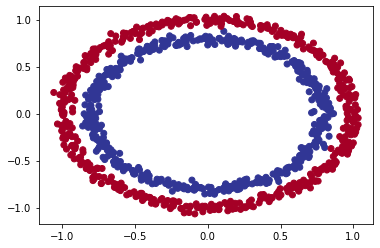

In [46]:
#check out our data
#first index of X and second index of X
plt.scatter(X[:,0],X[:,1 ],c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


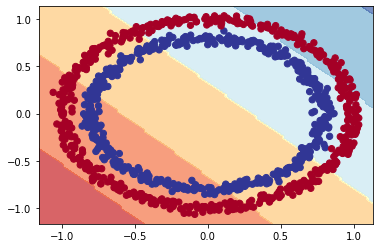

In [47]:
#Check decision boundary  for the latest model
plot_decision_boundary(model_6,X,y)

# Lets try build our  first Neural Network with a non -linear activation function


In [48]:
#set random seed
tf.random.set_seed(42)


#Build Model with a non-linear activation 
model_7=tf.keras.Sequential([
    Dense(units=1,activation="relu"),
    
])

#compile model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=(['accuracy'])
)

In [49]:
histotry=model_7.fit(X,y ,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.0095 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9741 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9496 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9243 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9372 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9303 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9495 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9495 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9494 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9494 - accuracy: 0.4850
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 5.8755 - accuracy: 0.4870
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8753 - accuracy: 0.4870
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8752 - accuracy: 0.4870
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8751 - accuracy: 0.4870
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8749 - accuracy: 0.4870
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8748 - accuracy: 0.4880
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8747 - accuracy: 0.4870
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8745 - accuracy: 0.4880
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8744 - accuracy: 0.4880
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8743 - accuracy: 0.4880
Epoch 93/100


313/313 [==============================] - 0s 1ms/step
doing binary classification


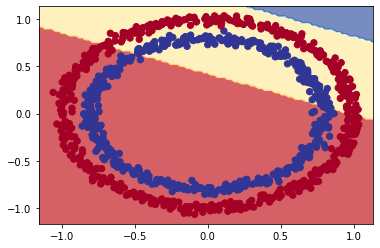

In [50]:
#Check decision boundary  for the latest model
plot_decision_boundary(model_7,X,y)

In [51]:
#Time to replicate the multi-layer neural network from Tensorflow Playground

#set the random seed 
tf.random.set_seed(42)

#create the model
model_8=tf.keras.Sequential([
    Dense(units=4,activation="relu"),
    Dense(units=2,activation="relu")
])

#compile model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
)

#fit model
history=model_8.fit(X,y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 3.3636 - accuracy: 0.4990
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 3.0816 - accuracy: 0.5060
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 2.8335 - accuracy: 0.4990
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 2.5365 - accuracy: 0.4980
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 2.3059 - accuracy: 0.5020
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 2.1236 - accuracy: 0.5060
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 1.9790 - accuracy: 0.5090
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 1.8692 - accuracy: 0.5100
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 1.6085 - accuracy: 0.5150
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.9178 - accuracy: 0.5210
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.7160
Epoch 84/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.7210
Epoch 85/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.7210
Epoch 86/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.7100
Epoch 87/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.7040
Epoch 88/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6326 - accuracy: 0.6990
Epoch 89/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.6960
Epoch 90/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.6880
Epoch 91/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.7010
Epoch 92/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.7000
Epoch 93/200


313/313 [==============================] - 0s 953us/step
doing multiclass classification


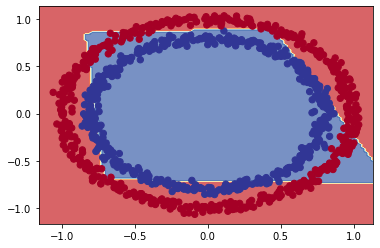

In [52]:
#Check decision boundary  for the latest model
plot_decision_boundary(model_8,X,y)

In [53]:
model_8.evaluate(X,y) #not right way to evaluate model

32/32 [==============================] - 0s 2ms/step - loss: 0.4402 - accuracy: 0.7760


[0.4402252733707428, 0.7760000228881836]

# Lets change the out put layer activation function


**Note:** we are working on a binary classification so we will use a **sigmoid** for output activation function but in a case of multiclass we would use a **softmax** function 

In [54]:
#Time to replicate the multi-layer neural network from Tensorflow Playground

#set the random seed 
tf.random.set_seed(42)

#create the model
model_9=tf.keras.Sequential([
    Dense(units=4,activation="relu"),
    Dense(units=4,activation="relu"),
    Dense(units=1,activation="sigmoid")
])

#compile model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
)

#fit model
history=model_9.fit(X,y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5050
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5100
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5130
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5120
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5170
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5210
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5280
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5310
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5310
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5300
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8520
Epoch 84/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8630
Epoch 85/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8580
Epoch 86/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8620
Epoch 87/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.8580
Epoch 88/200
32/32 [==============================] - 0s 1ms/step - loss: 0.4164 - accuracy: 0.8670
Epoch 89/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8670
Epoch 90/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8730
Epoch 91/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8730
Epoch 92/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8770
Epoch 93/200


In [55]:
model_9.evaluate(X,y)#not right way to evalute ...

32/32 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9850


[0.10734821856021881, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classification


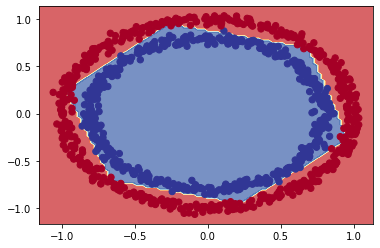

In [56]:
#Check decision boundary  for the latest model
plot_decision_boundary(model_9,X,y)

**Note:** The combination  of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

#create a toy tensor  (similar to the  data we pass into our models

In [57]:
A = tf.cast(tf.range(-10,10),tf.float32)
A 

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

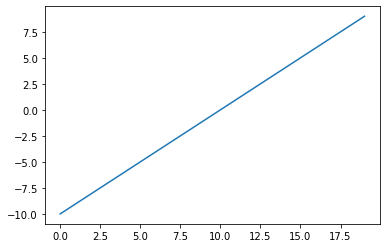

In [58]:
#visualize our tensor
plt.plot(A)

In [59]:
#let's start by replicating  sigmoid  -sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
    return 1 /(1+ tf.exp(-x))

#use sigmoid on our toy  tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

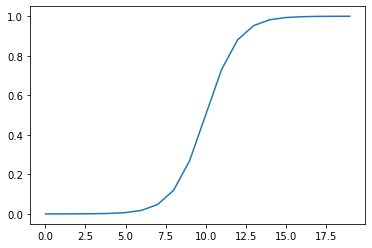

In [60]:
#Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [61]:
# Lets recreate the relu function
def relu(x):
    return tf.maximum(0,x)

In [62]:
#pass our toy data to the custom  relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

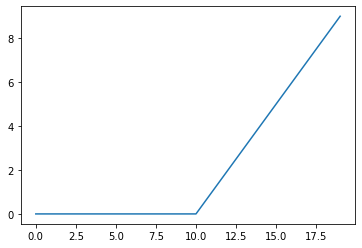

In [63]:
plt.plot(relu(A))

In [64]:
#lets  try linear  activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

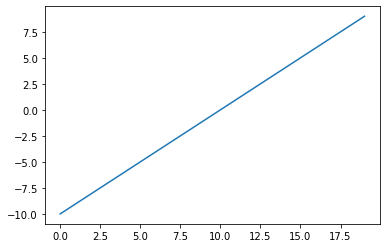

In [65]:
plt.plot(tf.keras.activations.linear(A))

In [66]:
#Does A even change
A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Evaluating  and Improving  our Classification 

So far we have been training and evaluating on the same dataset.However, in Machine Learning this is basically a sin

Lets create a training and a test set




In [67]:
len(X)

1000

In [68]:
#Lets spliy into train test sets
X_train,y_train=X[:800],y[:800] #80% for training
X_test,y_test=X[800:],y[800:] #20% for testing

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [69]:
# lets recreate a model to fit trainin data and evaluate on the testing set

# set random seed
tf.random.set_seed(42)

# 1.create model
model_10=tf.keras.Sequential([
    Dense(units=4,activation="relu"),
    Dense(units=4,activation="relu"),
    Dense(units=1,activation="sigmoid"),
])

# 2. compile model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.01),
                 metrics=['accuracy']
)
# 3.fit model
history = model_10.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.4988
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.4988
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5000
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5000
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5125
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5425
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5700
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5675
Epoch 11/

25/25 [==============================] - 0s 3ms/step - loss: 0.4138 - accuracy: 0.9287
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.9362
Epoch 85/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.9388
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.9362
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.9425
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.9400
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.9500
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.9488
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.9550
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.9538
Epoch 93/100


In [70]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.9550


[0.3236372768878937, 0.9549999833106995]

313/313 [==============================] - 0s 980us/step
doing binary classification
313/313 [==============================] - 0s 951us/step
doing binary classification


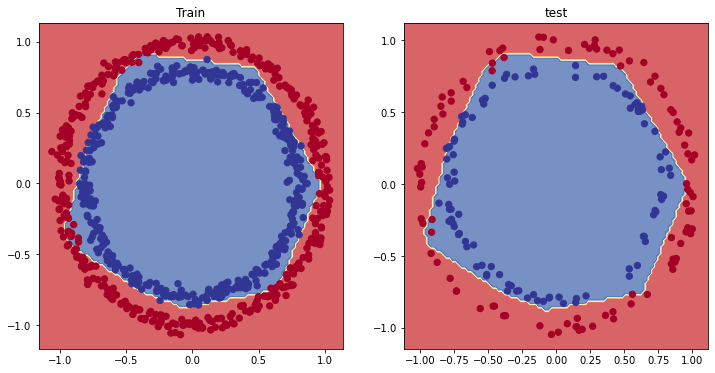

In [71]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_10,X_test,y_test)
plt.show()

In [72]:

#set the random seed 
tf.random.set_seed(42)

#create the model
model_11=tf.keras.Sequential([
    Dense(units=4,activation="relu"),
    Dense(units=2,activation="relu"),
    Dense(units=1,activation="sigmoid")
])

#compile model
model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
)

#fit model
history=model_11.fit(X_train,y_train, epochs=150)

Epoch 1/150
25/25 [==============================] - 1s 2ms/step - loss: 0.7001 - accuracy: 0.4875
Epoch 2/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4850
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.4837
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4787
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4712
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.4787
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4737
Epoch 8/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4737
Epoch 9/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4725
Epoch 10/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4450
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.6212
Epoch 84/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.6300
Epoch 85/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.6425
Epoch 86/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.6087
Epoch 87/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.6375
Epoch 88/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.6388
Epoch 89/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6500
Epoch 90/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.6438
Epoch 91/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.6475
Epoch 92/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6384 - accuracy: 0.6500
Epoch 93/150


In [73]:
model_11.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.7750


[0.5290582776069641, 0.7749999761581421]

313/313 [==============================] - 0s 968us/step
doing binary classification
313/313 [==============================] - 0s 972us/step
doing binary classification


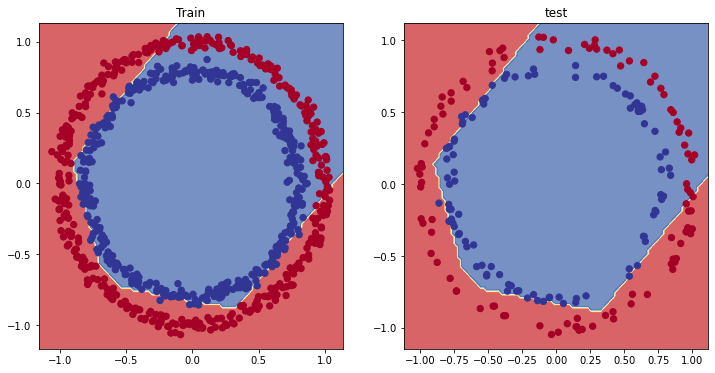

In [74]:
#plot decision boundary  for the training and test sets

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_11,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_11,X_test,y_test)
plt.show()

In [75]:

#set the random seed 
tf.random.set_seed(42)

#create the model
model_12=tf.keras.Sequential([
    Dense(units=5,activation="relu"),
    Dense(units=4,activation="relu"),
    Dense(units=1,activation="sigmoid")
])

#compile model
model_12.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"]
)

#fit model
history=model_12.fit(X_train,y_train, epochs=150)

Epoch 1/150
25/25 [==============================] - 1s 2ms/step - loss: 0.6864 - accuracy: 0.4988
Epoch 2/150
25/25 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.4988
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.4988
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5275
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5387
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5437
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5362
Epoch 8/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5400
Epoch 9/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5450
Epoch 10/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5487
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.9912
Epoch 84/150
25/25 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.9887
Epoch 85/150
25/25 [==============================] - 0s 2ms/step - loss: 0.2913 - accuracy: 0.9912
Epoch 86/150
25/25 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.9825
Epoch 87/150
25/25 [==============================] - 0s 1ms/step - loss: 0.2809 - accuracy: 0.9912
Epoch 88/150
25/25 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.9837
Epoch 89/150
25/25 [==============================] - 0s 1ms/step - loss: 0.2711 - accuracy: 0.9900
Epoch 90/150
25/25 [==============================] - 0s 2ms/step - loss: 0.2654 - accuracy: 0.9875
Epoch 91/150
25/25 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.9875
Epoch 92/150
25/25 [==============================] - 0s 2ms/step - loss: 0.2561 - accuracy: 0.9900
Epoch 93/150


In [76]:
model_12.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1193 - accuracy: 0.9900


[0.11925683915615082, 0.9900000095367432]

313/313 [==============================] - 0s 960us/step
doing binary classification
313/313 [==============================] - 0s 962us/step
doing binary classification


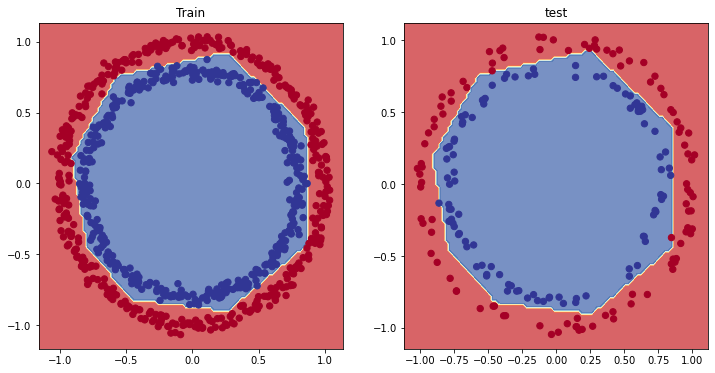

In [77]:
#plot decision boundary  for the training and test sets

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_12,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_12,X_test,y_test)
plt.show()

In [78]:
model_12.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 5)                 15        
                                                                 
 dense_35 (Dense)            (None, 4)                 24        
                                                                 
 dense_36 (Dense)            (None, 1)                 5         
                                                                 
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


## HISTORY

## Plot the loss (or training )curves 

In [79]:
# Convert the history object into a Dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.686380,0.49875
1,0.683441,0.49875
2,0.681434,0.49875
3,0.679989,0.52750
4,0.678813,0.53875
...,...,...
145,0.117908,0.99625
146,0.116411,0.99750
147,0.115440,0.99625
148,0.113376,0.99625


Text(0.5, 0, 'epochs')

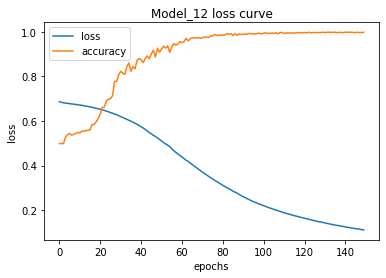

In [80]:
pd.DataFrame(history.history).plot()
plt.title("Model_12 loss curve")
plt.ylabel("loss")
plt.xlabel("epochs")

***Note:*** For many problems, the loss function going down means
the model is improving (the predictions it's maing are getting closer to the ground truth labels.

## Finding The Best Learning Rate 
to find the ideal learninf rate ( the learning rate where the loss decreases the most during training)we're going to use the following steps:
* A learning rate **callback** - you can think of a calllback as an extra piece of functionality, you can add to your model *while* its training.

*Another model (we could use the same one as bove ,but we're practicing building models here)

*A modified loss curve plot

In [81]:
#set random seed
tf.random.set_seed(42)

#create a model(same as model_12)
model_13=tf.keras.Sequential([
    Dense(units=4,activation="relu"),
    Dense(units=4,activation="relu"),
    Dense(units=1,activation="sigmoid")
])

#compile model
model_13.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10** (epoch/20))

#fit model
history_13=model_13.fit(X_train,
            y_train,
            epochs=150,
            callbacks=[lr_scheduler ])

Epoch 1/150
25/25 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.4963 - lr: 1.7783e-04
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.4975 - lr: 2.2387e-04
Epoch 9/150
25/25 [==============================] - 0s 2ms/step - loss:

Epoch 73/150
25/25 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9337 - lr: 0.3981
Epoch 74/150
25/25 [==============================] - 0s 2ms/step - loss: 0.2622 - accuracy: 0.9038 - lr: 0.4467
Epoch 75/150
25/25 [==============================] - 0s 2ms/step - loss: 0.2592 - accuracy: 0.9050 - lr: 0.5012
Epoch 76/150
25/25 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 0.8875 - lr: 0.5623
Epoch 77/150
25/25 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9212 - lr: 0.6310
Epoch 78/150
25/25 [==============================] - 0s 1ms/step - loss: 0.5501 - accuracy: 0.8012 - lr: 0.7079
Epoch 79/150
25/25 [==============================] - 0s 2ms/step - loss: 0.7320 - accuracy: 0.5825 - lr: 0.7943
Epoch 80/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.5875 - lr: 0.8913
Epoch 81/150
25/25 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.5

<AxesSubplot:xlabel='epochs'>

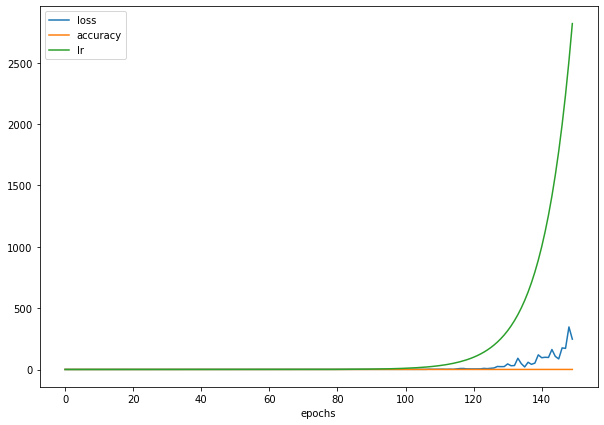

In [82]:
pd.DataFrame(history_13.history).plot(figsize=(10,7),xlabel='epochs')

In [83]:
#set random seed
tf.random.set_seed(42)

#create a model(same as model_12)
model_14=tf.keras.Sequential([
    Dense(units=4,activation="relu"),
    Dense(units=4,activation="relu"),
    Dense(units=1,activation="sigmoid")
])

#compile model
model_14.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10** (epoch/20))

#fit model
history_14=model_14.fit(X_train,
            y_train,
            epochs=100,
            callbacks=[lr_scheduler ])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7047 - accuracy: 0.4950 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7044 - accuracy: 0.4950 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7041 - accuracy: 0.4900 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7038 - accuracy: 0.4925 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.4938 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.4938 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7024 - accuracy: 0.4963 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.4863 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7077 - accuracy: 0.4762 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.5063 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.5013 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.5013 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7146 - accuracy: 0.5138 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7114 - accuracy: 0.5213 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.4963 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7114 - accuracy: 0.5

<AxesSubplot:xlabel='epochs'>

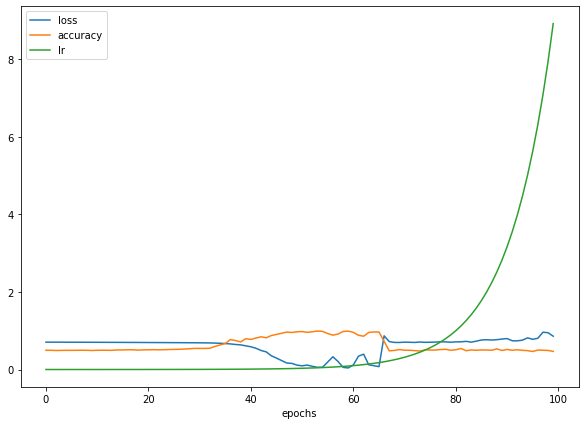

In [84]:
pd.DataFrame(history_14.history).plot(figsize=(10,7),xlabel='epochs')

In [85]:
#set random seed
tf.random.set_seed(42)

#create a model(same as model_12)
model_15=tf.keras.Sequential([
    Dense(units=4,activation="relu"),
    Dense(units=4,activation="relu"),
    Dense(units=1,activation="sigmoid")
])

#compile model
model_15.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10** (epoch/20))

#fit model
history_15=model_15.fit(X_train,
            y_train,
            epochs=80,
            callbacks=[lr_scheduler ])

Epoch 1/80
25/25 [==============================] - 1s 2ms/step - loss: 0.7086 - accuracy: 0.5075 - lr: 1.0000e-04
Epoch 2/80
25/25 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.5050 - lr: 1.1220e-04
Epoch 3/80
25/25 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.5025 - lr: 1.2589e-04
Epoch 4/80
25/25 [==============================] - 0s 2ms/step - loss: 0.7062 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/80
25/25 [==============================] - 0s 2ms/step - loss: 0.7053 - accuracy: 0.4975 - lr: 1.5849e-04
Epoch 6/80
25/25 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.4975 - lr: 1.7783e-04
Epoch 7/80
25/25 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.4925 - lr: 1.9953e-04
Epoch 8/80
25/25 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.4950 - lr: 2.2387e-04
Epoch 9/80
25/25 [==============================] - 0s 2ms/step - loss: 0.7016 -

<AxesSubplot:xlabel='epochs'>

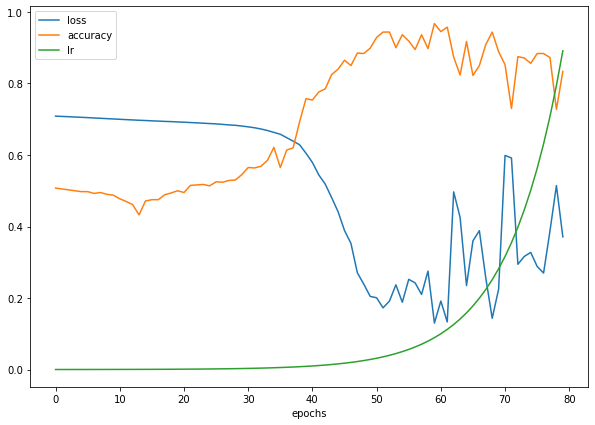

In [86]:
pd.DataFrame(history_15.history).plot(figsize=(10,7),xlabel='epochs')

Text(0.5, 1.0, 'Learning rate vs Loss')

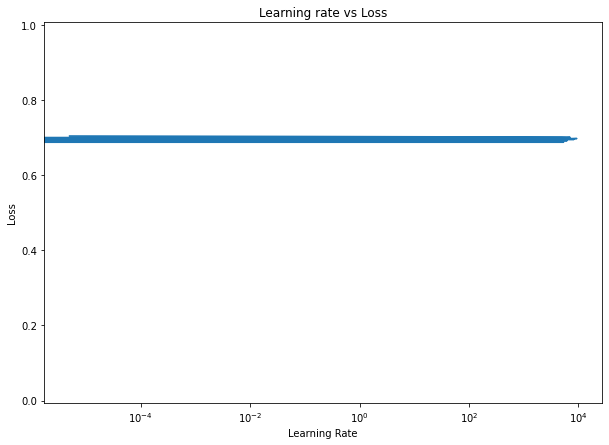

In [87]:
##plot learning rate vs loss
lrs=1e-4* (10** tf.range(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_14.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs Loss')

In [88]:
## model with higher lr=0.02

In [89]:
#set random seed
tf.random.set_seed(42)

model_16=tf.keras.Sequential([
    Dense(units=4,activation="relu"),
    Dense(units=4,activation="relu"),
    Dense(units=1,activation="sigmoid")
])

#compile model
model_16.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])


#fit model
history_16=model_16.fit(X_train,
            y_train,
            epochs=80)

Epoch 1/80
25/25 [==============================] - 1s 2ms/step - loss: 0.7025 - accuracy: 0.5075
Epoch 2/80
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5125
Epoch 3/80
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5288
Epoch 4/80
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5325
Epoch 5/80
25/25 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5200
Epoch 6/80
25/25 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5525
Epoch 7/80
25/25 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5700
Epoch 8/80
25/25 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5763
Epoch 9/80
25/25 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5663
Epoch 10/80
25/25 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.5750
Epoch 11/80
25/25 [

In [90]:
#set random seed
tf.random.set_seed(42)

model_17=tf.keras.Sequential([
    Dense(units=4,activation="relu"),
    Dense(units=4,activation="relu"),
    Dense(units=1,activation="sigmoid")
])

#compile model
model_17.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=['accuracy'])


#fit model
history_17=model_17.fit(X_train,
            y_train,
            epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6923 - accuracy: 0.4913
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4888
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.4975
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5088
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5100
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5138
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5175
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5200
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5275
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5275
Epoch 11/

25/25 [==============================] - 0s 1ms/step - loss: 0.6095 - accuracy: 0.6988
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.7075
Epoch 85/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6040 - accuracy: 0.7325
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.7125
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5984 - accuracy: 0.7475
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.7425
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.7425
Epoch 90/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5872 - accuracy: 0.7575
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7738
Epoch 92/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5779 - accuracy: 0.7887
Epoch 93/100


In [91]:
model_17.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7400


[0.5696743130683899, 0.7400000095367432]

313/313 [==============================] - 0s 945us/step
doing binary classification
313/313 [==============================] - 0s 992us/step
doing binary classification


<function matplotlib.pyplot.show(close=None, block=None)>

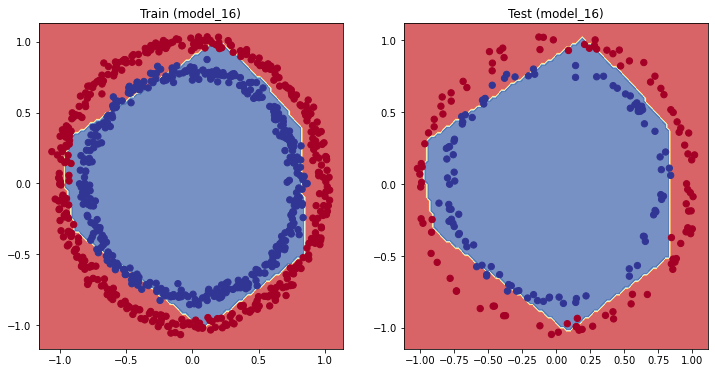

In [92]:
#Plot decison boundaries
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Train (model_16)')
plot_decision_boundary(model_16,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title('Test (model_16)')
plot_decision_boundary(model_16,X=X_test,y=y_test)
plt.show

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 946us/step
doing binary classification


<function matplotlib.pyplot.show(close=None, block=None)>

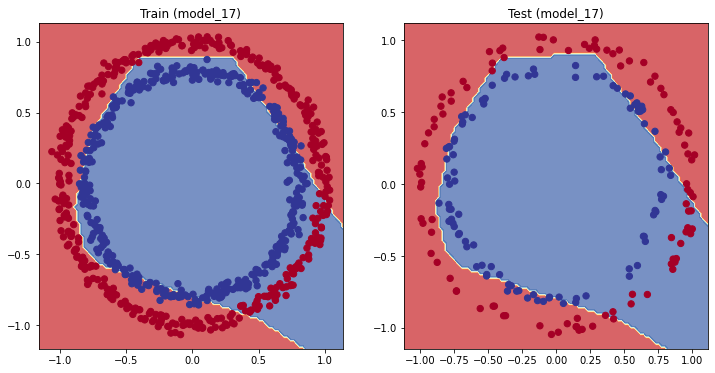

In [93]:
#Plot decison boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train (model_17)')
plot_decision_boundary(model_17,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title('Test (model_17)')
plot_decision_boundary(model_17,X=X_test,y=y_test)
plt.show

## More classification evaluation methods
Alongside visualizing our metrics resutls as much as possible , ther are handful of other classification evaluatio methodss and metrics
that you should be familiar with:

*Accuracy

*Precision

*Recall

*Confusion matrix

*Classification report (from scikit-learn)  

In [94]:
#Check the accuracy our model
loss,accuracy = model_17.evaluate(X_test,y_test)
print(f"Model loss on test set :{loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7400
Model loss on test set :0.5696743130683899
Model accuracy on test set: 74.00%


## How about confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
#make prediction
y_preds= model_17.predict(X_test)

#create confusion matrix
confusion_matrix(y_test,y_preds)
 

In [ ]:
#Lets inspect our data
y_test[:10]

In [ ]:
y_preds[:10]

In [ ]:
#error
# Loos like  our predictions array has come out in  **prediction probability** form .. the standard output from the
#sigmoid/softmax activations


In [ ]:
0.7430542

In [ ]:
#Lets convert predictions probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

In [ ]:
#create confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

## How about we pretify our confusion matrix?
#Note:the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix




In [ ]:
%pip install itertool


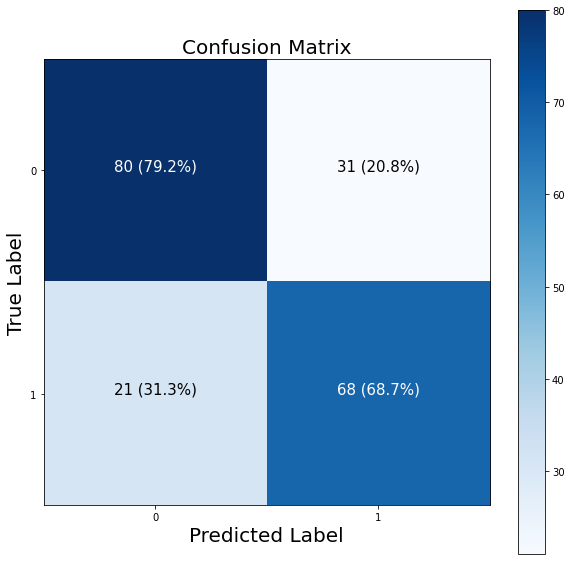

In [108]:
import itertools
figsize =(10,10)


#create the confusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis] #normalise our confusion matrix
n_classes=cm.shape[0]

#let's prettify it
fig,ax =plt.subplots(figsize=figsize)

#create a matrix plot
cax =ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

#create classes
classes =False

if classes:
    
    labels=classes
else:
    labels = np.arange(cm.shape[0])
    
#labels the axes
ax.set(title="Confusion Matrix",
      xlabel="Predicted Label",
      ylabel="True Label",
      xticks =np.arange(n_classes),
      yticks =np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

#set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")v
ax.xaxis.tick_bottom()

#Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


#set threshold for different colors
threshold = (cm.max()+cm.min())/2.

#plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[j,i]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]> threshold else "black",
            size=15)

## Working with a larger example . (Multiclass Classification)

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalCrossentropy,BinaryCrossentropy

2023-10-08 00:34:25.815473: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-08 00:34:25.815504: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-08 00:34:27.747172: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-10-08 00:34:27.748181: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-10-08 00:34:27.748198: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [2]:
from tensorflow.keras.datasets import fashion_mnist

#The data has already been sorted into training and testing dataset

(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

In [3]:
#show the fist triaining examples
print(f"Training Samples:\n {train_data[0]}\n")
print(f"Training labels: \n {train_labels[0]}\n")


Training Samples:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [6]:
#check the shape of a single example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

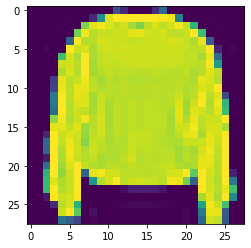

In [8]:
# plot a single  
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [9]:
# check out sumple sample labels
train_labels[7]

2

In [10]:
#create a small list so we can index onto our training lable so they're human readerble
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Bag","Ankle Boot"]


Text(0.5, 1.0, 'Shirt')

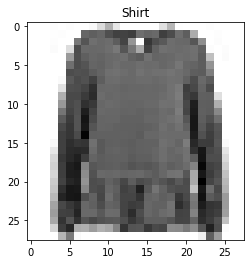

In [14]:
#Plot an example image and it's label
plt.imshow(train_data[18],cmap=plt.cm.binary)
plt.title(class_names[train_labels[18]])

Text(0.5, 1.0, 'Sandal')

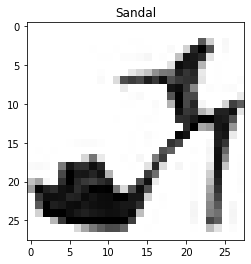

In [20]:
#make it more easy to search
index_of_choice=9
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

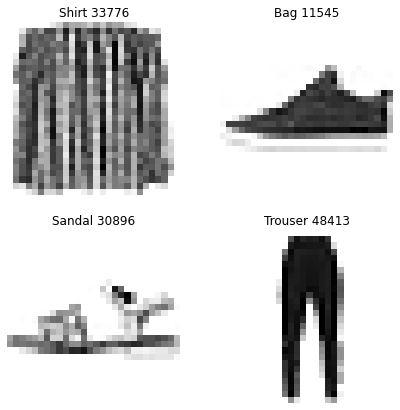

In [38]:
#Plot multiple random images of fashion Mnist data
import random
plt.figure(figsize=(7,7))
for i  in range(4):
    ax=plt.subplot(2,2,i+1)
    rand_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(f"{class_names[train_labels[rand_index]]} {rand_index}")
    plt.axis(False)

## Build a multi-class classification model

for our multi-class classification model, we can use a similar architecture to out binary classifications, howerver,we are going to  tweak some things:
* Input shape=28x28(the shape of our images) 
* Output shape= 10(one per class of cloth)
* Loss function= tf.keras.losses.CategoricalCrosentropy()
    * if your lables are one-ho encoded  use CategoricalCrossentropy()
    * if your labels are integers form,use SpareseCategoricalCrossentropy()
* Outputlayer activation =Softmax(not sigmoid)


**Notes for  shape ERROR**
* check your Input shape ,
    *  should be of the same shape as the data , 
    * flatten the input layer before passing to the hidden layers
        * Use tf.keras.layers.Flatten()
* Output shape 
    * one per class
    
* Check the loss function 
    * SpareseCategoricalCrossentropy()-> integers
    * CategoricaCrossentropy()-> one-hot-encoded
 
        

In [46]:
train_data[0].shape

(28, 28)

In [44]:
#For the output layer ...
#remember it's an index so it start from 0
#hence output shape >10
train_labels[0]

9

In [47]:
#set random seed
tf.random.set_seed(42)

#create the model
model_1=tf.keras.Sequential([
    Flatten(units=(28,28)),
    Dense(units=4,activation="relu"),
    Dense(units=4,activation="relu"),
    Dense(units=10,activation="Softmax")
])



#Compile model
#our output data values are not one hot encoded but intergers so we use spares...
model_1.compile(loss=tf.keras.losses.SparesCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
)


#Fit model

model_1.fit(train_data,
           trian_labels,
           epochs=10,
           validation_data=(test_data,test_labels))

NameError: name 'Flatten' is not defined

In [ ]:
#set random seed
tf.random.set_seed(42)

#create the model
model_1=tf.keras.Sequential([
    Flatten(units=(28,28)),
    Dense(units=4,activation="relu"),
    Dense(units=4,activation="relu"),
    Dense(units=10,activation="Softmax")
])



#Compile model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
)


#Fit model

model_1.fit(train_data,
           trian_labels,
           epochs=10,
           validation_data=(test_data,test_labels))